<a href="https://colab.research.google.com/github/CynthiaMaina/Implemntation/blob/main/Task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [19]:
#%%bigquery --SQL TUTORIAL sql-tutorial-416914 df

project_id = "sql-tutorial-416914"
from google.cloud import bigquery
import humanize
client = bigquery.Client(project=project_id)

In [24]:
job = client.get_job('bquxjob_d14e37e_18f4f8b7169')
print(job.query)

 WITH arrestrate AS (
  SELECT EXTRACT(YEAR FROM date) AS year,
         COUNT(*) AS totalcrimes,
         SUM(CASE WHEN arrest = TRUE THEN 1 ELSE 0 END) AS totalarrests,
         ROUND((SUM(CASE WHEN arrest = TRUE THEN 1 ELSE 0 END) / COUNT(*)) * 100, 2) AS arrest_rate
  FROM `bigquery-public-data.chicago_crime.crime`
  GROUP BY year
)
SELECT year, totalcrimes, totalarrests, arrestrate
FROM arrestrate
ORDER BY arrest_rate DESC
;



In [28]:
job = client.get_job('bquxjob_d14e37e_18f4f8b7169')
destination = job.destination

In [29]:
df = client.query(job.query).to_dataframe()


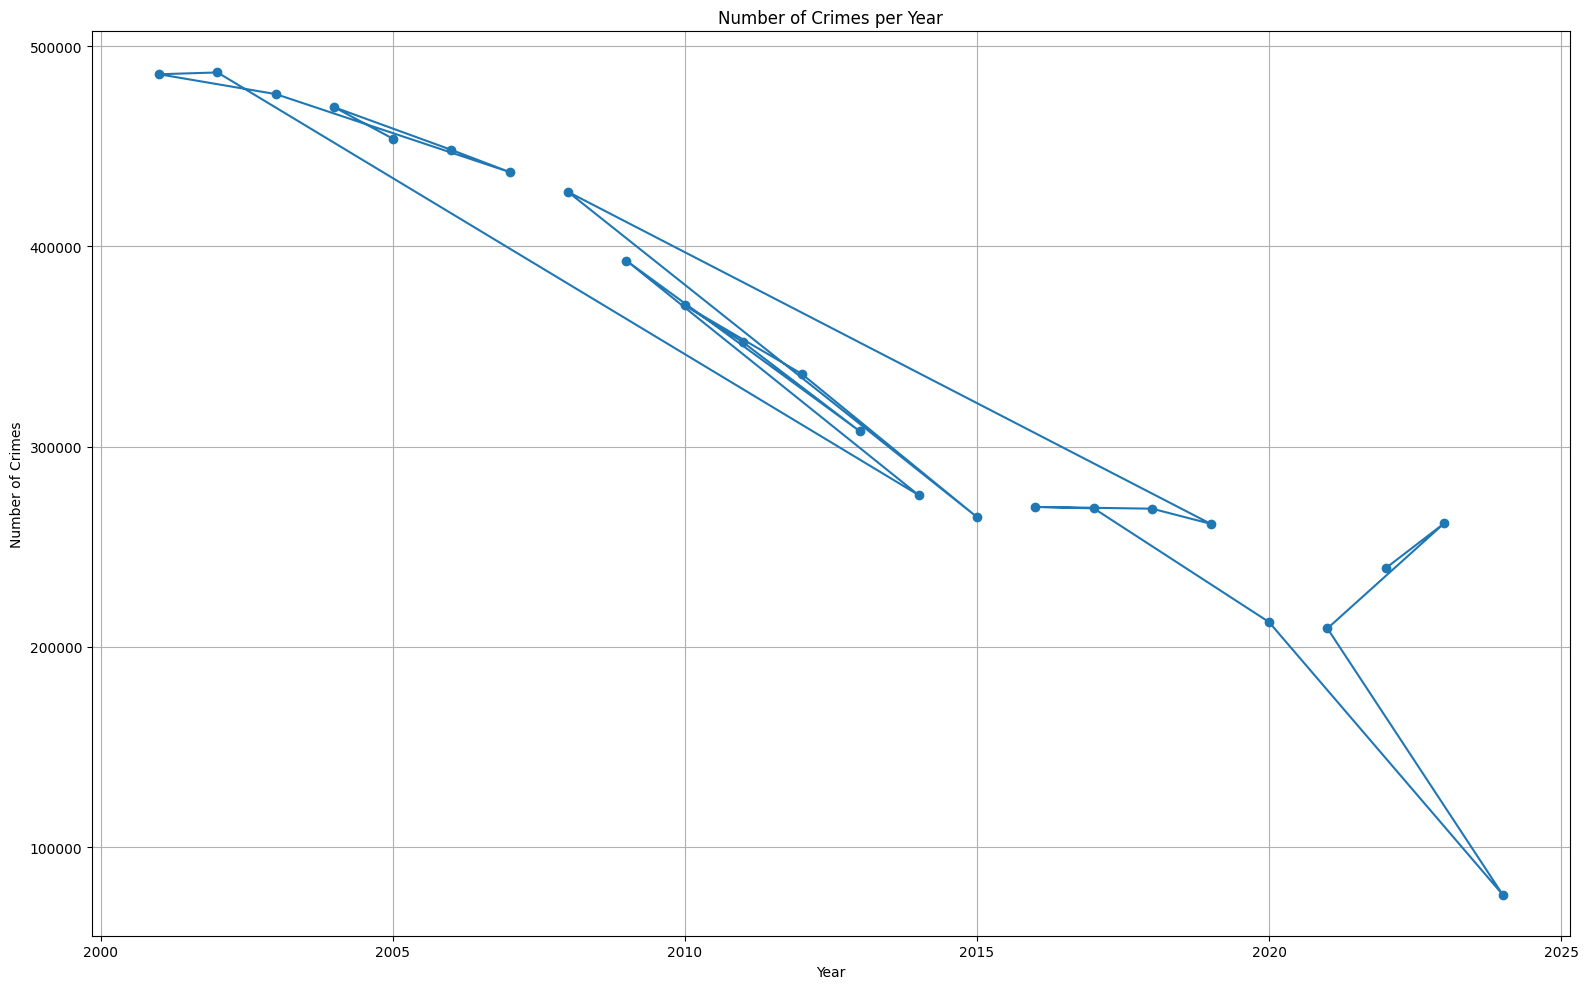

In [37]:
## Task 4 What year had the highest arrest rate? Plot the number of crimes per year and comment on the trend.

import pandas as pd
import matplotlib.pyplot as plt



# Plotting the number of crimes per year
plt.figure(figsize=(16, 10))
plt.plot(df['year'], df['totalcrimes'], marker='o', linestyle='-')
plt.title('Number of Crimes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.grid(True)
#plt.xticks(df['year'], rotation=45)
plt.tight_layout()
plt.show()

